In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from function import PiecewiseFunction, PolynomialFunction, SinusoidalFunction
from network import TreeNode
import numpy as np
import matplotlib.pyplot as plt

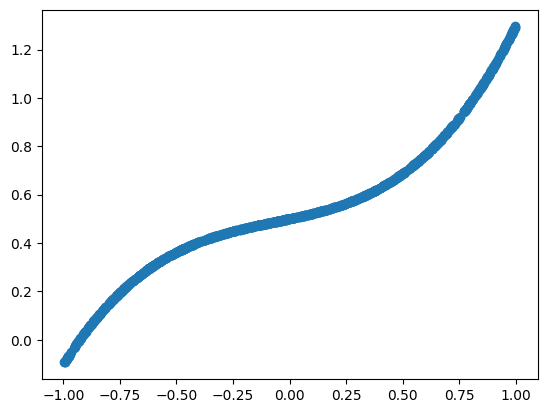

In [3]:
# func = PiecewiseFunction(lower_bound=-1, upper_bound=1, num_splits=4)
# func = SinusoidalFunction(amplitude=0.5, frequency=3, phase=0)
func = PolynomialFunction(coefficients=[0.5, 0.2, 0.1, 0.5])
# func = SinusoidalFunction(amplitude=0.5, frequency=10, phase=0)

# Sample dataset
inputs = np.random.uniform(-1, 1, 1000)
outputs = np.array([func(x) for x in inputs])

# Plot the dataset
plt.scatter(inputs, outputs)

In [4]:
from torch.utils.data import Dataset, DataLoader

# simple dataset given inputs and outputs
class SimpleDataset(Dataset):
    def __init__(self, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        # convert to float32 and torch tensor
        return np.array([self.inputs[idx]]).astype(np.float32), np.array([self.outputs[idx]]).astype(np.float32)


In [5]:
dims = [1, 10, 10, 1]
temperature = 0.5

model = TreeNode(dims, temperature=temperature)
train_dataset = SimpleDataset(inputs, outputs)

In [6]:
from torch.optim import Adam
from torch.nn import MSELoss

# simple training loop
epochs = 1000
batch_size = 64
lr = 1e-3
optimizer = Adam(model.parameters(), lr=lr)
dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
loss_fn = MSELoss()
model.train()

for epoch in range(epochs):
    for i, (x, y) in enumerate(dataloader):
        optimizer.zero_grad()
        # loss = loss_fn(model(x), y)
        loss = model.expected_loss(x, x.clone(), y, loss_fn).mean()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch}, Loss {loss.item()}")




Epoch 0, Loss 0.4213842749595642
Epoch 1, Loss 0.20702555775642395
Epoch 2, Loss 0.12101521342992783
Epoch 3, Loss 0.06955049932003021
Epoch 4, Loss 0.022218402475118637
Epoch 5, Loss 0.01890183612704277
Epoch 6, Loss 0.01565677858889103
Epoch 7, Loss 0.014384791254997253
Epoch 8, Loss 0.007166610565036535
Epoch 9, Loss 0.010441526770591736
Epoch 10, Loss 0.009211604483425617
Epoch 11, Loss 0.007290964480489492
Epoch 12, Loss 0.00502134021371603
Epoch 13, Loss 0.005648554768413305
Epoch 14, Loss 0.0053911469876766205
Epoch 15, Loss 0.010459909215569496
Epoch 16, Loss 0.008159664459526539
Epoch 17, Loss 0.009958449751138687
Epoch 18, Loss 0.0068367645144462585
Epoch 19, Loss 0.0076056369580328465
Epoch 20, Loss 0.007785805966705084
Epoch 21, Loss 0.01005535013973713
Epoch 22, Loss 0.00800190307199955
Epoch 23, Loss 0.005156207829713821
Epoch 24, Loss 0.0044059245847165585
Epoch 25, Loss 0.008180689997971058
Epoch 26, Loss 0.0068787140771746635
Epoch 27, Loss 0.005339206662029028
Epoch 2

tensor([[ 12.4405, -14.4041]], grad_fn=<AddmmBackward0>) tensor([[1.0000e+00, 2.1956e-12]], grad_fn=<SoftmaxBackward0>) True
tensor([[ 8.6023, -7.9236]], grad_fn=<AddmmBackward0>) tensor([[1.0000e+00, 6.6508e-08]], grad_fn=<SoftmaxBackward0>) True
tensor([[ 11.8036, -13.7410]], grad_fn=<AddmmBackward0>) tensor([[1.0000e+00, 8.0558e-12]], grad_fn=<SoftmaxBackward0>) True
tensor([[ 8.5751, -7.8901]], grad_fn=<AddmmBackward0>) tensor([[1.0000e+00, 7.0672e-08]], grad_fn=<SoftmaxBackward0>) True
tensor([[ 11.1574, -13.0721]], grad_fn=<AddmmBackward0>) tensor([[1.0000e+00, 3.0009e-11]], grad_fn=<SoftmaxBackward0>) True
tensor([[ 8.5478, -7.8567]], grad_fn=<AddmmBackward0>) tensor([[1.0000e+00, 7.5097e-08]], grad_fn=<SoftmaxBackward0>) True
tensor([[ 10.5113, -12.4032]], grad_fn=<AddmmBackward0>) tensor([[1.0000e+00, 1.1179e-10]], grad_fn=<SoftmaxBackward0>) True
tensor([[ 8.5205, -7.8232]], grad_fn=<AddmmBackward0>) tensor([[1.0000e+00, 7.9798e-08]], grad_fn=<SoftmaxBackward0>) True
tensor([

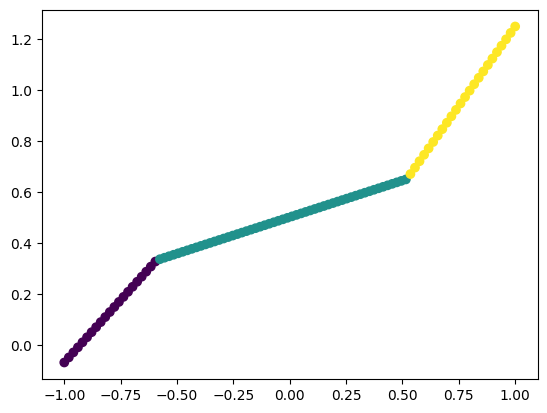

In [7]:
import torch
# eval the model on points linearly spaced in the interval

eval_inputs = np.linspace(-1, 1, 100)
model.eval()
ys = []
labels = []
label_to_int = {}
for x in eval_inputs:
    # y, label = model(torch.tensor([[x]]).float())
    x_tensor = torch.tensor([[x]]).float()
    y, label = model.inference(x_tensor, x_tensor.clone())
    ys.append(y.item())
    
    # map label string to color
    if label not in label_to_int:
        label_to_int[label] = len(label_to_int)
    labels.append(label_to_int[label])
    
print(label_to_int)
    
# plot, and make points with the same label the same color
plt.scatter(eval_inputs, ys, c=labels)
plt.show()

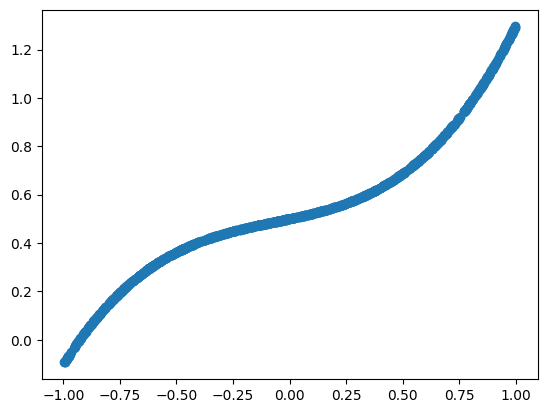

In [8]:
# Plot the dataset
plt.scatter(inputs, outputs)
plt.show()